In [1]:
import math 

import numpy as np 
import matplotlib.pyplot as plt 

* Gradient Descent(GD)in One Dimension 
* Gradient descent in one dimension is an excellent example to explain why the gradient descent algorithm may reduce the value of the objective function.


In [2]:
def f(x):     return x**2  # objective function
def gradf(x): return 2 * x # its derivative

Next, use $x=10$ as the initial value and assume $\eta=0.2$. Using gradient descent to iterate $x$ for 10 times we can see that, eventually, the value of $x$ approaches the optimal solution.

$$x \leftarrow x - \eta f'(x)$$

In [3]:
def gd(eta):
    x = 10
    results = [x]
    for i in range(10):
        x -= eta * gradf(x)
        results.append(x)
    print('epoch 10, x:', x)
    return results

res = gd(0.2)

epoch 10, x: 0.06046617599999997


The progress of optimizing over $x$ can be plotted as follows.

In [4]:
def plot(X, Y=None, xlabel=None, ylabel=None, legend=[], xlim=None,
         ylim=None, xscale='linear', yscale='linear', fmts=None,
         figsize=(3.5, 2.5), axes=None):
    """Plot multiple lines"""
    plt.rcParams['figure.figsize'] = figsize
    axes = axes if axes else plt.gca()
    #if isinstance(X, nd.NDArray): X = X.asnumpy()
    #if isinstance(Y, nd.NDArray): Y = Y.asnumpy()
    if not hasattr(X[0], "__len__"): X = [X]
    if Y is None: X, Y = [[]]*len(X), X
    if not hasattr(Y[0], "__len__"): Y = [Y]
    if len(X) != len(Y): X = X * len(Y)
    if not fmts: fmts = ['-']*len(X)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        #if isinstance(x, nd.NDArray): x = x.asnumpy()
        #if isinstance(y, nd.NDArray): y = y.asnumpy()
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

In [5]:
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """A utility function to set matplotlib axes"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend: axes.legend(legend)
    axes.grid()

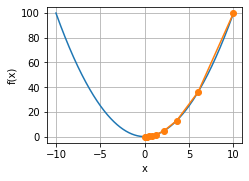

In [6]:
def show_trace(res):
    n = max(abs(min(res)), abs(max(res)))
    f_line = np.arange(-n, n, 0.01)
    plt.rcParams['figure.figsize'] = (3.5, 2.5)
    plot([f_line, res], [[f(x) for x in f_line], [f(x) for x in res]],'x', 'f(x)', fmts=['-', '-o'])

show_trace(res)

* Learning Rate 
*  If we use a learning rate that is too small, it will cause $x$ to update very slowly, requiring more iterations to get a better solution.

consider the progress in the same optimization problem for $\eta = 0.05$. As we can see, even after 10 steps we are still very far from the optimal solution.

epoch 10, x: 3.4867844009999995


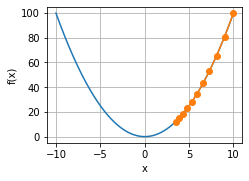

In [7]:
show_trace(gd(0.05))

Conversely, if we use an excessively high learning rate, $\left|\eta f'(x)\right|$ might be too large for the first-order Taylor expansion formula. <br/>
 For example, when we set the learning rate to $\eta=1.1$, $x$ overshoots the optimal solution $x=0$ and gradually diverges.

epoch 10, x: 61.917364224000096


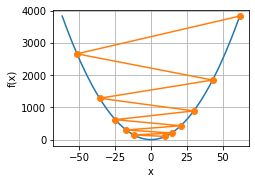

In [8]:
show_trace(gd(1.1))

* Local Minima 
* To illustrate what happens for nonconvex functions consider the case of $f(x) = x \cdot \cos c x$. This function has infinitely many local minima.

epoch 10, x: -1.528165927635083


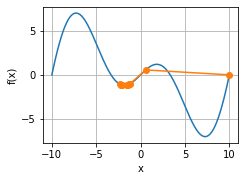

In [9]:
c = 0.15 * math.pi
def f(x):     return x*math.cos(c * x) 
def gradf(x): return math.cos(c * x) - c * x * math.sin(c * x)

show_trace(gd(2))

* Multivariate Gradient Descent 

In [10]:
def show_trace_2d(f, res):
    """Show the trace of 2D variables during optimization."""
    x1, x2 = zip(*res)
    plt.rcParams['figure.figsize'] = (3.5, 2.5)
    plt.plot(x1, x2, '-o', color='#ff7f0e')
    x1 = np.arange(-5.5, 1.0, 0.1)
    x2 = np.arange(min(-3.0, min(x2) - 1), max(1.0, max(x2) + 1), 0.1)
    x1, x2 = np.meshgrid(x1, x2)
    plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
    plt.xlabel('x1')
    plt.ylabel('x2')

In [11]:
def train_2d(trainer):
    """Optimize a 2-dim objective function with a customized trainer."""
    # s1 and s2 are internal state variables and will 
    # be used later in the chapter
    x1, x2, s1, s2 = -5, -2, 0, 0
    results = [(x1, x2)]
    for i in range(20):
        x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
        results.append((x1, x2))
    print('epoch %d, x1 %f, x2 %f' % (i + 1, x1, x2))
    return results

In [12]:
def f(x1, x2): return x1 ** 2 + 2 * x2 ** 2   # objective
def gradf(x1, x2): return (2 * x1, 4 * x2)    # gradient 
def gd(x1, x2, s1, s2): 
    (g1, g2) = gradf(x1, x2)                  # compute gradient
    return (x1 -eta * g1, x2 -eta * g2, 0, 0) # update variables

eta = 0.1

epoch 20, x1 -0.057646, x2 -0.000073


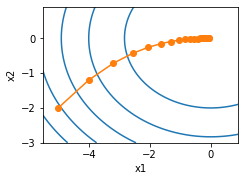

In [13]:
show_trace_2d(f, train_2d(gd))

* Adaptive Methods 
* Newton's Mothod 

In [15]:
c = 0.5
def f(x):     return math.cosh(c * x)        # objective
def gradf(x): return c * math.sinh(c * x)    # derivative
def hessf(x): return c**2 * math.cosh(c * x) # hessian

epoch 10, x: 0.0


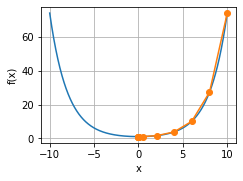

In [16]:
# hide learning rate for now
def newton(eta = 1):
    x = 10
    results = [x]
    for i in range(10):
        x -= eta * gradf(x) / hessf(x)
        results.append(x)
    print('epoch 10, x:', x)
    return results

show_trace(newton())

Now let's see what happens when we have a nonconvex function, such as $f(x) = x \cos(c x)$. After all, note that in Newton's method we end up dividing by the Hessian.

* nonconvex function, such as $f(x) = x \cos(c x)$. After all, note that in Newton's method we end up dividing by the Hessian. This means that if the second derivative is negative we would walk into the direction of increasing $f$. That is a fatal flaw of the algorithm. 

In [17]:
c = 0.15 * math.pi
def f(x):     return x*math.cos(c * x) 
def gradf(x): return math.cos(c * x) - c * x * math.sin(c * x)
def hessf(x): return - 2 * c * math.sin(c * x) - x * c**2 * math.cos(c * x)

epoch 10, x: 26.83413291324767


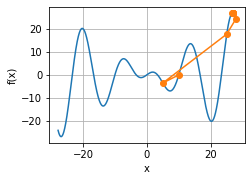

In [19]:
show_trace(newton(1))

How can we fix it? One way would be to 'fix' the Hessian by taking its absolute value instead. ```Another strategy is to bring back the learning rate```.

epoch 10, x: 7.269860168684531


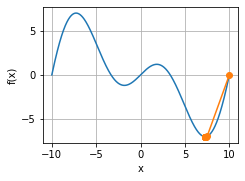

In [20]:
show_trace(newton(0.5))